# Imports

In [1]:
from tensorflow import keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

train_images = train_images/255
test_images = test_images/255

In [3]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
print(train_images.shape)
print(test_images.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


**See some examples**

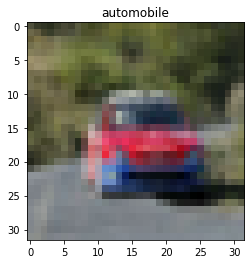

In [6]:
index = 6969

plt.figure()
plt.imshow(train_images[index])
plt.title(labels[int(train_labels[index])])
plt.show()

# Model

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu',
                              input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 32)                7

In [8]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size=64, epochs=5
                    )

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


782/782 [==============================] - 79s 100ms/step - loss: 1.6167 - accuracy: 0.4040 - val_loss: 1.3420 - val_accuracy: 0.5198
Epoch 2/5
782/782 [==============================] - 63s 80ms/step - loss: 1.2384 - accuracy: 0.5545 - val_loss: 1.1875 - val_accuracy: 0.5731
Epoch 3/5
782/782 [==============================] - 64s 81ms/step - loss: 1.0831 - accuracy: 0.6130 - val_loss: 1.0235 - val_accuracy: 0.6406
Epoch 4/5
782/782 [==============================] - 63s 81ms/step - loss: 0.9874 - accuracy: 0.6508 - val_loss: 0.9834 - val_accuracy: 0.6536
Epoch 5/5
782/782 [==============================] - 62s 79ms/step - loss: 0.9145 - accuracy: 0.6784 - val_loss: 0.9659 - val_accuracy: 0.6620


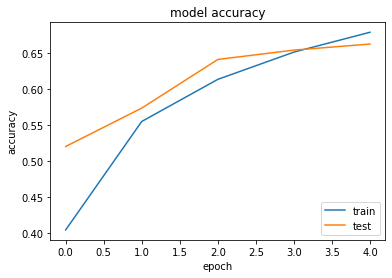

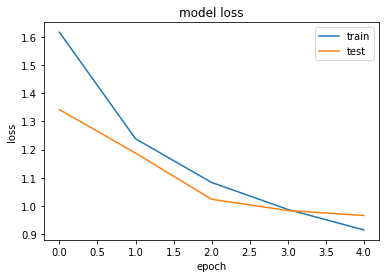

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Evaluation and Prediction

In [11]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 3s - loss: 0.9659 - accuracy: 0.6620 - 3s/epoch - 11ms/step


[0.9658536314964294, 0.6620000004768372]

In [12]:
predictions = model.predict(test_images)

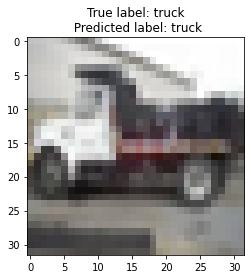

In [13]:
index = 969

plt.figure()
plt.imshow(test_images[index])
plt.title(f"True label: {labels[int(test_labels[index])]}\n Predicted label: {labels[np.argmax(predictions[index])]}")
plt.show()

# Using ```ImageDataGenerator```

In [14]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

**Image Generator**

In [15]:
datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest'
                             )

**Test the generator on an image**

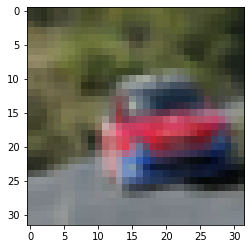

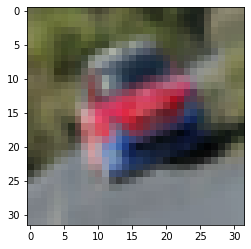

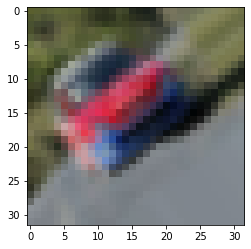

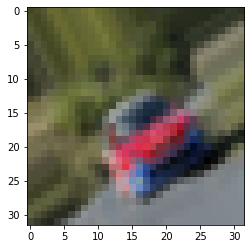

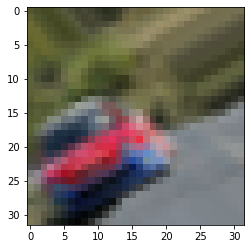

In [16]:
test_img = train_images[6969]
test_img = image.img_to_array(test_img)
test_img = test_img.reshape((1,)+test_img.shape)

i=0
for batch in datagen.flow(test_img, save_prefix='test', save_format='jpeg'):
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i>4:
    break

plt.show()

# Pre-trained Models

In [17]:
import os
import tensorflow_datasets as tfd

In [18]:
# tfd.disable_progress_bar()

setattr(tfd.image_classification.cats_vs_dogs, '_URL',"https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip")
# microsoft changed the url to the cats_and_dogs dataset
# tensorflow still haven't updated it!
# today is July 4th, 2022
(raw_train, raw_validation, raw_test), metadata = tfd.load('cats_vs_dogs',
                                                           split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
                                                           with_info=True,
                                                           as_supervised=True
                                                           )

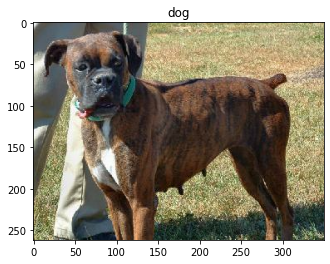

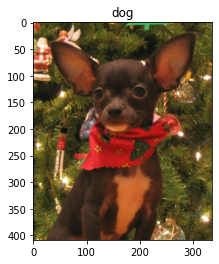

In [19]:
get_label_name = metadata.features['label'].int2str

for img, label in raw_train.take(2):
  plt.figure()
  plt.imshow(img)
  plt.title(get_label_name(label))

**Preprocessing (resizing all images to same size)**

In [20]:
IMG_SIZE = 224

def reshape_img(img, label):
  img = tf.cast(img, tf.float32)
  img = (img/127.5) - 1
  img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
  return img, label

train = raw_train.map(reshape_img)
validation = raw_validation.map(reshape_img)
test = raw_test.map(reshape_img)

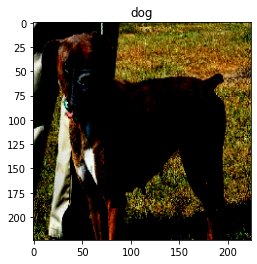

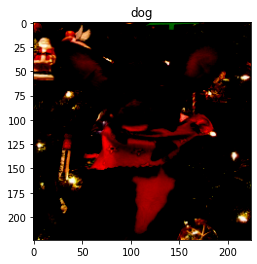

In [21]:
for img, label in train.take(2):
  plt.figure()
  plt.imshow(img)
  plt.title(get_label_name(label))

In [22]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

**Pre-trained Model**

In [23]:
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

base_model = keras.applications.MobileNetV3Large(input_shape=IMG_SHAPE,
                                                 include_top=False,
                                                 # weights are by default imagenet
                                                 )
base_model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

**Freezing the model**

In [24]:
base_model.trainable = False
base_model.summary()

Model: "MobilenetV3large"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

**The schewpid classifier**

In [25]:
model = keras.Sequential([base_model,
                          keras.layers.GlobalAveragePooling2D(),
                          keras.layers.Dense(1)
                          ])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 MobilenetV3large (Functiona  (None, 7, 7, 960)        2996352   
 l)                                                              
                                                                 
 global_average_pooling2d (G  (None, 960)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_4 (Dense)             (None, 1)                 961       
                                                                 
Total params: 2,997,313
Trainable params: 961
Non-trainable params: 2,996,352
_________________________________________________________________


In [26]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'],
              )

In [27]:
validation_steps=20
model.evaluate(validation_batches, steps = validation_steps)

20/20 [==============================] - 21s 835ms/step - loss: 0.7217 - accuracy: 0.4688


[0.7216861844062805, 0.46875]

In [28]:
history = model.fit(train_batches,
                    epochs=3,
                    validation_data=validation_batches)

acc = history.history['accuracy']
print(acc)

Epoch 1/3
582/582 [==============================] - 583s 991ms/step - loss: 0.6543 - accuracy: 0.5589 - val_loss: 0.6304 - val_accuracy: 0.6006
Epoch 2/3
582/582 [==============================] - 599s 1s/step - loss: 0.6191 - accuracy: 0.6256 - val_loss: 0.6138 - val_accuracy: 0.6019
Epoch 3/3
582/582 [==============================] - 615s 1s/step - loss: 0.6030 - accuracy: 0.6442 - val_loss: 0.5990 - val_accuracy: 0.6500
[0.5589467883110046, 0.6256313920021057, 0.6442235112190247]


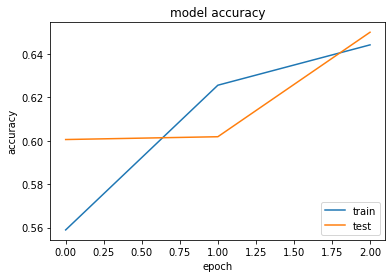

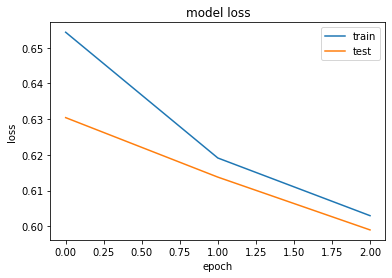

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [30]:
# save a model
# model.save("dogs_vs_cats.h5")
# load a model
# new_model = tf.keras.models.load_model('dogs_vs_cats.h5')